In [256]:
import sys
sys.path.append('..')
from auto_eval import bootstrap_kappa

In [257]:
import numpy as np
import json

# Load the JSON file
with open("../jsons/llm_eval_results_deepseek-r1.json", "r") as f: # or gpt-4o here
#with open("../jsons/llm_eval_results_gpt-4o.json", "r") as f: # or gpt-4o here
    llm_eval_results = json.load(f)

# Extract distinct lists from the JSON data
llms_evaluators_names = llm_eval_results["llms_evaluators_names"]
times_per_patient = llm_eval_results["times_per_patient"]
llm_scores_mat_results = llm_eval_results["llm_scores_mat_results"] 
kappa_results = llm_eval_results["kappa_results"]
kappa_ci_results = llm_eval_results["kappa_ci_results"]
evaluated_model = llm_eval_results["evaluated_model"]


In [258]:
# print all for sanity check
print("llms_evaluators_names: ", llms_evaluators_names)
print("times_per_patient: ", times_per_patient)
print("llm_scores_mat_results: ", llm_scores_mat_results)
print("kappa_results: ", kappa_results)
print("kappa_ci_results: ", kappa_ci_results)
print("evaluated_model: ", evaluated_model)

llms_evaluators_names:  ['Single Physician', 'Claude 3.5 v2', 'GPT-4.1', 'Llama 4 Scout', 'Llama 4 Maverick', 'Deepseek-R1', 'Claude 3.7', 'Gemini 2 Flash Exp', 'Gemini 2.5 Pro Preview', 'Phi 3.5', 'GPT-4.1 nano']
times_per_patient:  [928.890625, 24.275904504458108, 9.458764497439066, 15.374739694595338, 11.507836310068766, 34.53408700625102, 37.61436642805735, 14.529645133018494, 34.94462776184082, 28.429029130935668, 6.458261871337891]
llm_scores_mat_results:  [[[1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 0], [1, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 1, 1], [1, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 0], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 0], [1, 0, 1]], [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [1.0, 1.0, 1.0], [0.0, 1.0, 0.0], [1.0, 1.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [1.0, 1.0, 0.0], [1.0, 1.0, 1

In [259]:
single_phy_idx  = llms_evaluators_names.index("Single Physician")
llms_evaluators_names = [llms_evaluators_names[single_phy_idx]] +  [cont for i, cont in enumerate(llms_evaluators_names) if i != single_phy_idx]
times_per_patient = [times_per_patient[single_phy_idx]] +  [cont for i, cont in enumerate(times_per_patient) if i != single_phy_idx]
llm_scores_mat_results = [llm_scores_mat_results[single_phy_idx]] +  [cont for i, cont in enumerate(llm_scores_mat_results) if i != single_phy_idx]
kappa_results = [kappa_results[single_phy_idx]] +  [cont for i, cont in enumerate(kappa_results) if i != single_phy_idx]
kappa_ci_results = [kappa_ci_results[single_phy_idx]] +  [cont for i, cont in enumerate(kappa_ci_results) if i != single_phy_idx]

In [260]:
# print all for sanity check
print("llms_evaluators_names: ", llms_evaluators_names)
print("times_per_patient: ", times_per_patient)
print("llm_scores_mat_results: ", llm_scores_mat_results)
print("kappa_results: ", kappa_results)
print("kappa_ci_results: ", kappa_ci_results)
print("evaluated_model: ", evaluated_model)

llms_evaluators_names:  ['Single Physician', 'Claude 3.5 v2', 'GPT-4.1', 'Llama 4 Scout', 'Llama 4 Maverick', 'Deepseek-R1', 'Claude 3.7', 'Gemini 2 Flash Exp', 'Gemini 2.5 Pro Preview', 'Phi 3.5', 'GPT-4.1 nano']
times_per_patient:  [928.890625, 24.275904504458108, 9.458764497439066, 15.374739694595338, 11.507836310068766, 34.53408700625102, 37.61436642805735, 14.529645133018494, 34.94462776184082, 28.429029130935668, 6.458261871337891]
llm_scores_mat_results:  [[[1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 0], [1, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 1, 1], [1, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 0], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 0], [1, 0, 1]], [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [1.0, 1.0, 1.0], [0.0, 1.0, 0.0], [1.0, 1.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [1.0, 1.0, 0.0], [1.0, 1.0, 1

In [261]:
# Divide physician times by 2 as humans evaluate 2 summaries per round
times_per_patient[0] /= 2

In [262]:
jury_name = "LLM jury (i.e., majority vote\nof all LLMs)"

llms_evaluators_names += [jury_name]
times_per_patient += [sum(times_per_patient[1:])]
llm_scores_mat_results += [1 * (np.mean(llm_scores_mat_results[1:], axis=0) >= 0.5)]
kappa_orig, kappa_ci, _ = bootstrap_kappa(np.array(llm_scores_mat_results[-1]).flatten(), np.array(llm_scores_mat_results[0]).flatten())
kappa_results += [kappa_orig]
kappa_ci_results += [kappa_ci]

In [263]:
# print all for sanity check
print("llms_evaluators_names: ", llms_evaluators_names)
print("times_per_patient: ", times_per_patient)
print("llm_scores_mat_results: ", llm_scores_mat_results)
print("kappa_results: ", kappa_results)
print("kappa_ci_results: ", kappa_ci_results)
print("evaluated_model: ", evaluated_model)

llms_evaluators_names:  ['Single Physician', 'Claude 3.5 v2', 'GPT-4.1', 'Llama 4 Scout', 'Llama 4 Maverick', 'Deepseek-R1', 'Claude 3.7', 'Gemini 2 Flash Exp', 'Gemini 2.5 Pro Preview', 'Phi 3.5', 'GPT-4.1 nano', 'LLM jury (i.e., majority vote\nof all LLMs)']
times_per_patient:  [464.4453125, 24.275904504458108, 9.458764497439066, 15.374739694595338, 11.507836310068766, 34.53408700625102, 37.61436642805735, 14.529645133018494, 34.94462776184082, 28.429029130935668, 6.458261871337891, 217.12726233800254]
llm_scores_mat_results:  [[[1, 1, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 1, 0], [1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 0], [1, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 1, 1], [1, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0], [1, 1, 1], [1, 1, 0], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 0], [1, 0, 1]], [[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [1.0, 1.0, 1.0], [0.0, 1.0, 0.0], [1.0, 1.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 1

In [264]:
def create_custom_jury(selected_llm_names, custom_jury_name):
    """
    Create a custom LLM jury from selected LLM judges.
    
    Args:
        selected_llm_names: List of LLM names to include in the custom jury
        custom_jury_name: Name for the custom jury
    
    Returns:
        Dictionary with jury information: name, time, scores, kappa, kappa_ci, selected_llms
    """
    # Find indices of selected LLMs (excluding physician and main jury)
    selected_indices = []
    available_llms = [name for name in llms_evaluators_names if name not in ["Single Physician", jury_name]]
    
    for llm_name in selected_llm_names:
        if llm_name in available_llms:
            # Find original index in the full list
            original_idx = llms_evaluators_names.index(llm_name)
            selected_indices.append(original_idx)
        else:
            print(f"Warning: {llm_name} not found in available LLMs: {available_llms}")
    
    if len(selected_indices) == 0:
        print("Error: No valid LLMs selected")
        return None
    
    # Calculate custom jury metrics
    custom_time = sum([times_per_patient[idx] for idx in selected_indices])
    
    # Create majority vote from selected LLMs
    selected_scores = [llm_scores_mat_results[idx] for idx in selected_indices]
    custom_scores = 1 * (np.mean(selected_scores, axis=0) >= 0.5)
    
    # Calculate kappa with physician scores
    physician_scores = np.array(llm_scores_mat_results[0]).flatten()
    custom_kappa, custom_kappa_ci, _ = bootstrap_kappa(custom_scores.flatten(), physician_scores)
    
    return {
        'name': custom_jury_name,
        'time': custom_time,
        'scores': custom_scores,
        'kappa': custom_kappa,
        'kappa_ci': custom_kappa_ci,
        'selected_llms': selected_llm_names
    }

## Custom LLM Jury Feature

The notebook now supports creating custom LLM juries from selected individual LLM judges. This allows you to:

1. **Create smaller juries** with specific combinations of LLMs
2. **Compare performance** of different LLM combinations
3. **Optimize cost vs performance** by selecting the most effective LLMs

### How to use:

1. Use `create_custom_jury(selected_llm_names, custom_jury_name)` to create a custom jury
2. Pass the custom juries as a list to the `custom_juries` parameter in `plot_results()`
3. Custom juries will appear as **smaller diamonds** on the plots

### Example:
```python
# Create a custom jury with just GPT and Claude models
my_jury = create_custom_jury(["GPT-4.1", "Claude 3.5 v2"], "My Custom Jury")

# Plot with the custom jury
plot_results(times_per_patient, kappa_results, kappa_ci_results, llms_evaluators_names,
             custom_juries=[my_jury])
```

In [265]:
model_price_per_hour = {
    "Single Physician": 100,        # $100 per hour for a physician
    "GPT-4.1 nano": 0.063,          # $0.10 in  / $0.40 out per M tok
    "GPT-4.1": 1.260,               # $2.00 in  / $8.00  out per M tok
    "Claude 3.5 v2": 2.160,         # $3.00 in  / $15.00 out per M tok 
    "Claude 3.7": 2.160,            # same rate as above     
    "Llama 4 Scout": 0.1017,        # $0.18 in / $0.59 out per M tok
    "Llama 4 Maverick": 0.1494,     # $0.27 in / $0.85 out per M tok
    "Phi 3.5": 0.1008,              # $0.16 in / $0.64 out per M tok
    "Deepseek-R1": 0.3456,          # $0.55 in / $2.19 out per M tok
    "Gemini 2 Flash Exp": 0.063,    # $0.10 in / $0.40 out per M tok
    "Gemini 2.5 Pro Preview": 1.2375 # $1.25 in / $10.00 out per M tok
}

In [266]:
model_price_per_hour[llms_evaluators_names[-1]] = np.sum([v for k,v in model_price_per_hour.items() if k != "Single Physician"])

In [267]:
# Plotting the results
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FixedLocator

# Define NEJM colors plus additional ones
colors = [
'#BC3C29',  # red
'#0072B5',  # blue
'#E18727',  # orange
'#20854E',  # green
'#7876B1',  # purple
'#6F99AD',  # teal
'#FFDC91',  # yellow
'#EE4C97',  # pink
'#631879',  # deep purple
'#008080',  # teal blue
'#8A3324',  # brick red
'#4B0082',  # indigo
'#008B8B',  # dark cyan
'#556B2F',  # dark olive green
'#483D8B',  # slate blue
'#CD5C5C',  # indian red
'#B8860B',  # dark goldenrod
'#2F4F4F',  # dark slate gray
'#800000',  # maroon
'#191970'   # midnight blue
]

In [268]:
def plot_results(times_per_patient, kappa_results, kappa_ci_results, llms_evaluators_names, costs=False, custom_juries=None):
    if costs:
        y_label = 'Evaluation Cost ($/patient)'
    else:
        y_label = 'Evaluation Time (s/patient)'
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Find and extract the Single Physician data (always assume it exists)
    physician_index = llms_evaluators_names.index("Single Physician")
    physician_time = times_per_patient[physician_index]
    physician_kappa = kappa_results[physician_index]
    physician_ci = kappa_ci_results[physician_index]
    
    # Calculate physician cost if needed
    if costs:
        physician_cost = physician_time * model_price_per_hour["Single Physician"] / 3600
        physician_display_value = f"${physician_cost:.0f}"
        physician_label = f"Single Physician\n({physician_display_value}/patient on average)"
    else:
        physician_display_value = f"{int(physician_time)}"
        physician_label = f"Single Physician\n({physician_display_value}s/patient on average)"
        
    # Draw horizontal line for physician kappa with label including time/cost
    physician_line = ax.axhline(y=physician_kappa*100, color=colors[-1], linestyle='-', linewidth=3, 
                               label=physician_label, zorder=4)
    
    # Add shaded region for physician confidence interval
    ax.axhspan(physician_ci[0]*100, physician_ci[1]*100, alpha=0.2, color=colors[-1], zorder=3)
    
    # Create filtered lists without the physician data
    llms_names_filtered = [name for i, name in enumerate(llms_evaluators_names) if i != physician_index]
    times_filtered = [time for i, time in enumerate(times_per_patient) if i != physician_index]
    kappa_filtered = [kappa for i, kappa in enumerate(kappa_results) if i != physician_index]
    kappa_ci_filtered = [ci for i, ci in enumerate(kappa_ci_results) if i != physician_index]    
    
    ### Sort the results by alphabetic order
    # Create a list of tuples with all the data
    combined_data = list(zip(times_filtered, kappa_filtered, kappa_ci_filtered, llms_names_filtered))

    # Sort by llms_evaluators_names in ascending order
    sorted_data = sorted(combined_data, key=lambda x: x[3], reverse=False)

    # Unzip the sorted data back into separate lists
    times_filtered, kappa_filtered, kappa_ci_filtered, llms_names_filtered = map(list, zip(*sorted_data))

    # Calculate costs for all models if needed (before plotting)
    x_values = []
    for i, (time, name) in enumerate(zip(times_filtered, llms_names_filtered)):
        if costs:
            # Convert times to costs 
            price = model_price_per_hour.get(name, 1e6)  # Default to a large number if not found
            x_value = time * price / 3600  # multiply time per patient by no of patients and convert seconds to hours
        else:
            x_value = time
        x_values.append(x_value)

    # Plot points for each model with error bars (excluding physician)
    for i, (x, y, ci, name) in enumerate(zip(x_values, kappa_filtered, kappa_ci_filtered, llms_names_filtered)):
        
        if name == jury_name: 
            # get the index of the LLM Jury of all the above
            jury_index = llms_names_filtered.index(name)
            
            # Skip plotting for the LLM Jury of all the above
            continue
        
        y *= 100
        ci = [c * 100 for c in ci]
        
        scatter = ax.scatter(x, y, color=colors[i], s=100, marker='o', zorder=6, label=name)
        
        # Add vertical error bars for confidence interval
        ax.errorbar(x, y, yerr=[[y - ci[0]], [ci[1] - y]], fmt='none', zorder = 5,
                    color=colors[i], capsize=10, capthick=2, linewidth=2)
        
    # Add a scatter point for the LLM Jury of all the above
    scatter = ax.scatter(x_values[jury_index], kappa_filtered[jury_index] * 100,
                        color=colors[-2], s=250, marker='D', zorder=6, label=jury_name)
    
    # Add vertical error bars for confidence interval
    ax.errorbar(x_values[jury_index], kappa_filtered[jury_index] * 100, zorder = 5,
                yerr=[[kappa_filtered[jury_index] * 100 - kappa_ci_filtered[jury_index][0] * 100], 
                      [kappa_ci_filtered[jury_index][1] * 100 - kappa_filtered[jury_index] * 100]],
                fmt='none', color=colors[-2], capsize=10, capthick=2, linewidth=2)
    
    # Add custom juries if provided
    if custom_juries:
        for i, jury in enumerate(custom_juries):
            # Calculate x-value (time or cost)
            if costs:
                # Calculate total cost for custom jury
                custom_cost = 0
                for llm_name in jury.get('selected_llms', []):
                    if llm_name in model_price_per_hour:
                        # Find the time for this LLM in the original data
                        if llm_name in llms_evaluators_names:
                            llm_idx = llms_evaluators_names.index(llm_name)
                            llm_time = times_per_patient[llm_idx]
                            custom_cost += llm_time * model_price_per_hour[llm_name] / 3600
                x_value = custom_cost if costs else jury['time']
            else:
                x_value = jury['time']
            
            y_value = jury['kappa'] * 100
            ci = [c * 100 for c in jury['kappa_ci']]
            
            # Use a distinct color for custom juries (cycle through available colors)
            color_idx = (i + len(llms_names_filtered)) % len(colors)
            
            # Plot smaller diamond for custom jury
            scatter = ax.scatter(x_value, y_value, color=colors[color_idx], s=100, 
                               marker='D', zorder=7, label=jury['name'])
            
            # Add error bars
            ax.errorbar(x_value, y_value, yerr=[[y_value - ci[0]], [ci[1] - y_value]], 
                       fmt='none', color=colors[color_idx], capsize=8, capthick=1.5, 
                       linewidth=1.5, zorder=6)
    

    
    # Calculate all x-values including custom juries for proper axis limits
    all_x_values = x_values.copy()
    if custom_juries:
        for jury in custom_juries:
            if costs:
                # Calculate total cost for custom jury
                custom_cost = 0
                for llm_name in jury.get('selected_llms', []):
                    if llm_name in model_price_per_hour:
                        # Find the time for this LLM in the original data
                        if llm_name in llms_evaluators_names:
                            llm_idx = llms_evaluators_names.index(llm_name)
                            llm_time = times_per_patient[llm_idx]
                            custom_cost += llm_time * model_price_per_hour[llm_name] / 3600
                all_x_values.append(custom_cost)
            else:
                all_x_values.append(jury['time'])

    # Set x-axis limits based on all x-values
    if len(all_x_values) > 0:  # Make sure we have points to plot
        xmin = min(all_x_values) * 0.75
        xmax = max(all_x_values) * 1.25
        ax.set_xlim(xmin, xmax)

    # Add horizontal line at y=0 for reference (more visible now)
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2, zorder=2)

    # Set x-axis to logarithmic scale
    ax.set_xscale('log')
    
    # Create appropriate tick positions based on data range
    if costs:
        # For cost plot - include smaller values
        if xmin < 0.1:
            tick_positions = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500]
        else:
            tick_positions = [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500]
    else:
        # For time plot - focus on integers
        tick_positions = [1, 2, 5, 6, 8, 10, 20, 30, 40, 50, 100, 200, 500, 1000]
    
    # Filter tick positions to only show ticks within our data range
    tick_positions = [x for x in tick_positions if x >= xmin and x <= xmax]
    
    # Create custom tick labels that avoid scientific notation
    tick_labels = []
    for x in tick_positions:
        if x >= 100:
            tick_labels.append(f"{int(x)}")
        elif x >= 10:
            tick_labels.append(f"{int(x)}")
        elif x >= 1:
            tick_labels.append(f"{int(x)}")
        elif x >= 0.1:
            tick_labels.append(f"{x:.1f}")
        elif x >= 0.01:
            tick_labels.append(f"{x:.2f}")
        elif x >= 0.001:
            tick_labels.append(f"{x:.3f}")
        else:
            tick_labels.append(f"{x:.4f}")
    
    # Apply custom ticks and labels using FixedLocator to prevent matplotlib from changing them
    ax.xaxis.set_major_locator(FixedLocator(tick_positions))
    ax.set_xticklabels(tick_labels)

    # Add improved labels and title
    ax.set_xlabel(y_label, fontsize=16)
    ax.set_ylabel('Agreement with majority vote among seven physicians', fontsize=16)
    
    model_type = "GPT-4o" if evaluated_model == "GPT-4o" else evaluated_model
    ax.set_title(f'Hospital Course Summaries Generated with the \n{model_type}-based MedAgentBrief', fontsize=20)

    # Set y-axis limits 
    ax.set_ylim(-100, 100)

    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7, zorder=1)

    # Add legend in the lower right corner with adjusted font size and spacing
    legend = ax.legend(loc='lower right', fontsize=13)
    legend.set_frame_on(True)
    
    # Tight layout
    plt.tight_layout()

    # Show the plot
    plt.show()
    
    # Save the figure as a pdf
    if costs:
        fig.savefig(f"../pdfs/Cost_efficiency_{evaluated_model}.pdf", bbox_inches='tight', dpi=300)
    else:
        fig.savefig(f"../pdfs/Time_efficiency_{evaluated_model}.pdf", bbox_inches='tight', dpi=300)

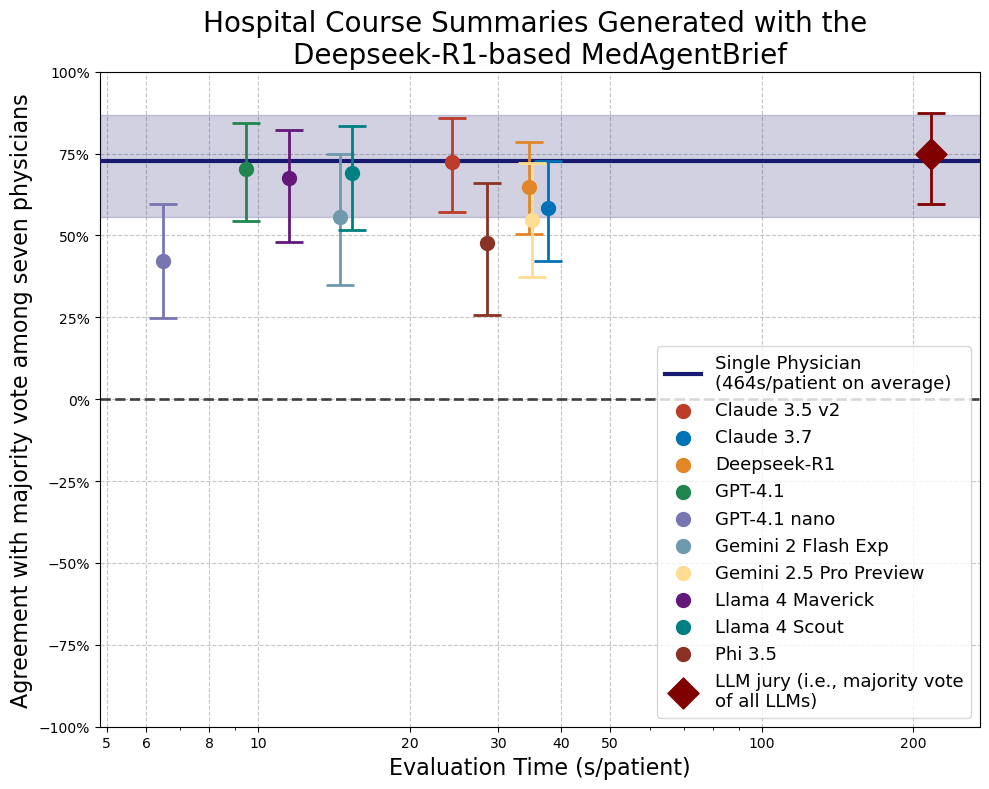

In [269]:
plot_results(times_per_patient, kappa_results, kappa_ci_results, llms_evaluators_names)

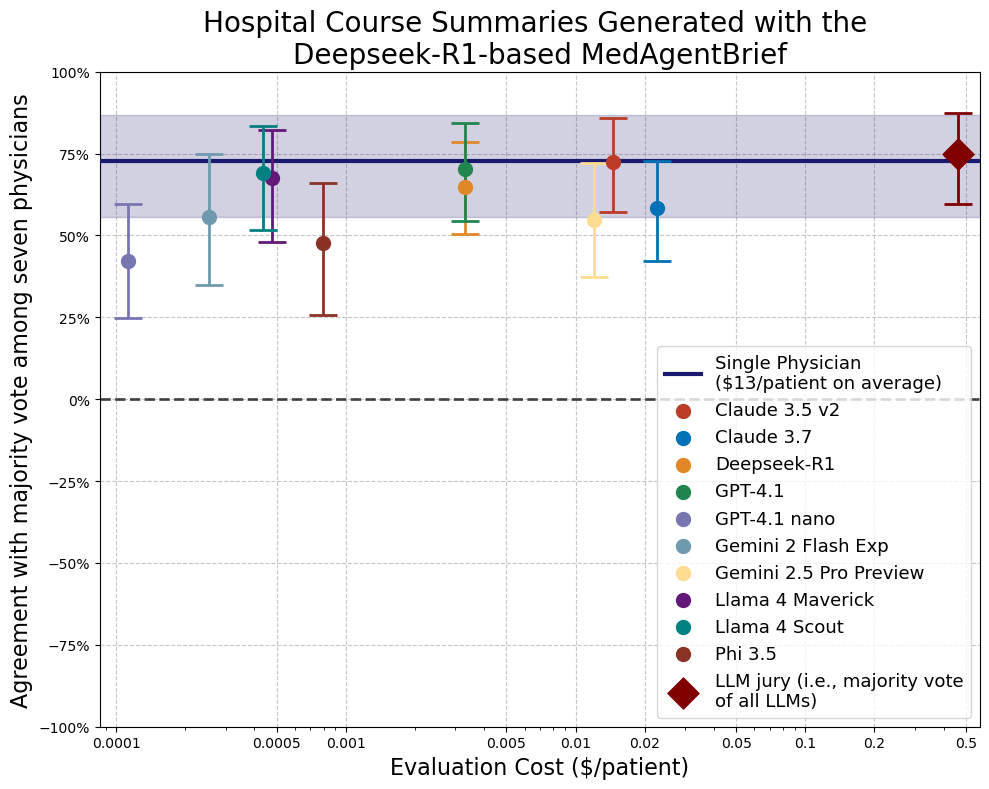

In [270]:
plot_results(times_per_patient, kappa_results, kappa_ci_results, llms_evaluators_names, costs=True)

In [271]:
# Example: Create custom LLM juries with specific models
# First, let's see what LLM evaluators are available (excluding physician and main jury)
available_llms = [name for name in llms_evaluators_names if name not in ["Single Physician", jury_name]]
print("Available LLMs for custom juries:")
for i, llm in enumerate(available_llms):
    print(f"{i+1}. {llm}")

Available LLMs for custom juries:
1. Claude 3.5 v2
2. GPT-4.1
3. Llama 4 Scout
4. Llama 4 Maverick
5. Deepseek-R1
6. Claude 3.7
7. Gemini 2 Flash Exp
8. Gemini 2.5 Pro Preview
9. Phi 3.5
10. GPT-4.1 nano


Custom jury created successfully!
Name: Small LLM Jury (Claude 3.5 v2
+ Llama 4 Scout + Deepseek-R1)
Kappa: 0.748
Time: 74.2s
Selected LLMs: ['Claude 3.5 v2', 'Llama 4 Scout', 'Deepseek-R1']


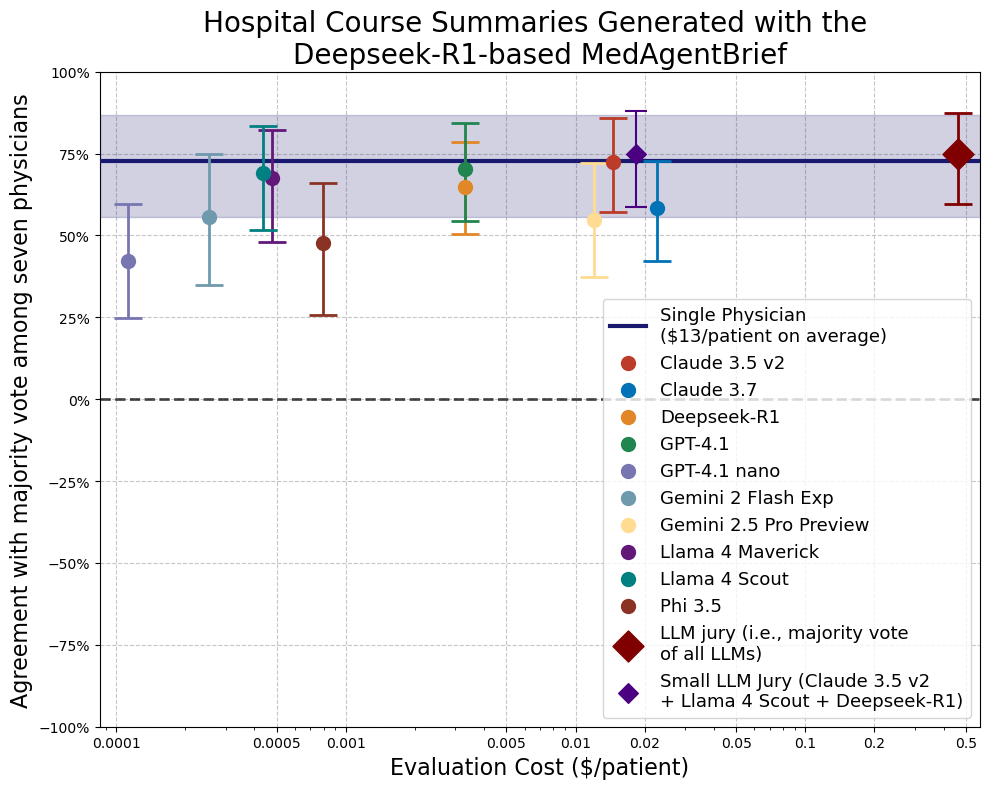

In [272]:
# Simple example of creating a custom jury with just 3 models
# This shows how users can easily create their own custom juries

# Create a simple 2-model jury
simple_jury = create_custom_jury(["Claude 3.5 v2", "Llama 4 Scout", "Deepseek-R1"],
                                  custom_jury_name="Small LLM Jury (Claude 3.5 v2\n+ Llama 4 Scout + Deepseek-R1)")
if simple_jury:
    print(f"Custom jury created successfully!")
    print(f"Name: {simple_jury['name']}")
    print(f"Kappa: {simple_jury['kappa']:.3f}")
    print(f"Time: {simple_jury['time']:.1f}s")
    print(f"Selected LLMs: {simple_jury['selected_llms']}")

    # Plot with just this one custom jury
    plot_results(times_per_patient, kappa_results, kappa_ci_results, llms_evaluators_names, costs=True,
                 custom_juries=[simple_jury])